# CS 584 :: Data Mining :: George Mason University :: Fall 2025


# Homework 1: KNN&PCA

- **100 points [6% of your final grade]**
- **Due Tuesday, Sep 28 by 11:59pm**

- *Goals of this homework:* (1) implement the KNN algorithm for classifying handwritten digit images; (2) implement the PCA algorithm to reduce the feature dimension so that we can speed up the KNN algorithm and also improve the classification performance; (3) tune the hyperparameters of the KNN and PCA algorithms to produce classification result as good as possible.

- *Submission instructions:* for this homework, you should submit your notebook file to **Canvas** (look for the homework 1 assignment there). Please name your submission **FirstName_Lastname_hw1.ipynb**, so for example, my submission would be something like **Ziwei_Zhu_hw1.ipynb**. Your notebook should be fully executed so that we can see all outputs.

## Part 1: KNN (50 points)

In this part, you need to implement your own KNN algorithm for classifying the digits (from 0 to 9) from the handwritten digit images (28 pixels * 28 pixels). The provided train.txt is the training data you will use for building your model. Each line in the file is one sample, whose first value is the ground-truth label, and the following 784 values are the pixels of the image. First of all, let's load the data by executing the following code.

In [179]:
import numpy as np

data = np.loadtxt("train.txt", delimiter=',')
labels = data[:, 0].astype(int)
features = data[:, 1:]
print('array of labels: shape ' + str(np.shape(labels)))
print('array of feature matrix: shape ' + str(np.shape(features)))

array of labels: shape (60000,)
array of feature matrix: shape (60000, 784)


Now, we have the label variable to store the ground-truth labels (from 0 to 9) of all 60,000 samples, and matrix features to store the image pixels of these samples. Next, let's execute the following code to plot the first 4 samples to see how these images look like.

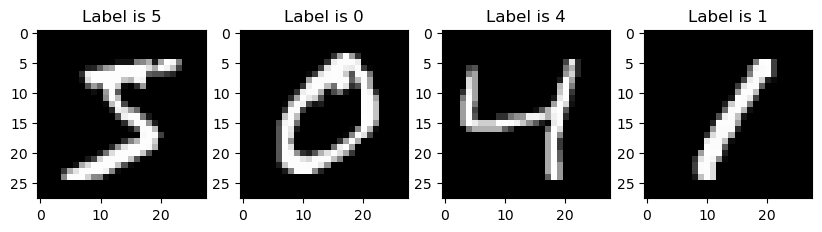

In [180]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 4, figsize=(10, 50))
for i in range(4):  
    ax[i].imshow(features[i].reshape((28, 28)), cmap=plt.get_cmap('gray'))
    ax[i].set_title('Label is %d' % labels[i])

Next, you need to **randomly** select 20% samples (sampling without replacement) from the data as the **validation set**, and generate the new **training set** by removing the selected validation samples from the original dataset. Write your code in the next cell.

**Note: You are NOT allowed to directly call APIs from an existing Machine Learning library like sklearn. But you can use the python 'random' library or the random module from 'numpy'**.

In [181]:
from numpy import random
import numpy as np

np.random.seed(31) # in case I need to rerun this block, I dont want to accidentaly contaminate the model with overlapping training/validation sets
set_index=random.choice(60000,size=3000,replace=False) #generate set index that I will pull from train data and use in validation only
validation_labels=labels[set_index] #add set index from train data to validation set
validation_features=features[set_index] # add set index from train data to features validation
train_labels=np.delete(labels,set_index,axis=0) #remove the random set_index rows from the train data labels so val set is disjoint
train_features=np.delete(features,set_index, axis=0) #remove the random set_index rows from the train data features so val set is disjoint

#print(len(validation_features[0]))
#print(len(train_features[0]))




Now, it's time to implement your KNN algorithm. In the next cell, please write your code to predict labels for samples in the validation set by the KNN model built on the training set. Here we set K = 10 and use the Euclidean distance to find neighbors.

**Note: You should implement the algorithm by Python, Numpy, and other libraries you think are necessary. You are NOT allowed to directly call APIs from an existing Machine Learning library like sklearn.**

**Note: Here, you should only use the labels from the training set for the KNN model.**

**Note: You can install and use the 'tqdm' library to help you track the process of your algorithm. Details are 'https://github.com/tqdm/tqdm'**

**Note: It takes 30~60 min to execute the KNN algorithm.**

[0 4 1 9 2 1 3 4 3 5]


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:03<00:00, 87.90it/s]


[]
[[37  0  0  0  0  0  1  0  2  0]
 [ 0 29  3  1  3  2  1  0  2  0]
 [ 0  0 20  0  0  0  0  0  1  0]
 [ 0  0  0 27  0  2  0  0  1  0]
 [ 0  0  1  0 25  0  1  0  0  1]
 [ 1  0  0  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  3  0  0  0  0 29  0  2]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 2  0  0  0  2  1  0  0  4 29]]


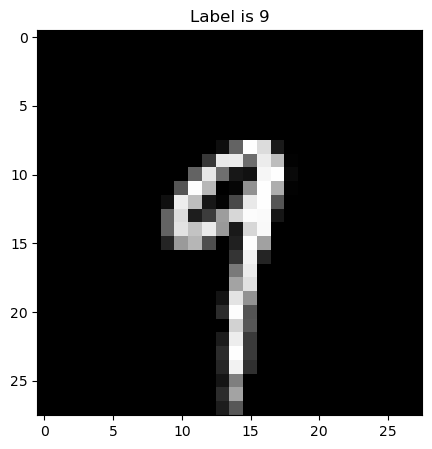

In [182]:
# Write your code here
from numpy import random
import numpy as np
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt 

prediction_table=np.zeros((10,10), dtype=int)

print(train_labels[:10])
def knn(val_set_features,val_set_labels,train_set_features,train_set_labels,k):
    predict=""
    
    for val_idx, vector in enumerate(tqdm(val_set_features)):
        stored_arr=[]
        for idx, tst_vector in enumerate(train_set_features):
            dist=distance(vector,tst_vector) #get ditance between the training set and the vector to identify the closest representation
            stored_arr.append([dist,int(train_set_labels[idx])]) # store distance of euclidean distance between training vector and validation vector along with correspondint traiing label
            #print(dist)
        stored_arr.sort(key=lambda label: label[0]) #sort the array values based on the distance (input as a tuple at position 0)
        k_freqs=[]
        for num in range(k):
            k_freqs.append(stored_arr[num][1]) #store labels that show up in k slots after sorting into k_freqs list to be counted
        
        count=Counter(k_freqs)
        predict=count.most_common(1)[0][0]
        #print(f"prediction was {predict} but truth was {val_set_labels[val_idx]}")
        prediction_table[predict,val_set_labels[val_idx]]+=1
        
def distance(test,train):
    dist=np.sqrt(np.sum((test-train)**2))
    return dist

knn(validation_features[:300],validation_labels[:300],train_features[:1000],train_labels[:1000],10)

fig, ax = plt.subplots(figsize=(5, 5))   # single plot
ax.imshow(validation_features[2].reshape((28, 28)), cmap='gray')
ax.set_title(f"Label is {validation_labels[2]}")

print(prediction_list[:30])
print(prediction_table)
#print(f"accuracy is: {total_success_count} ")
#print(prediction_list[2][0],prediction_list[2][1])


Then, please write code to compute the **Accuracy**, and **Micro-averaged and Macro-averaged F1 scores** to evaluate the performance on the validation set.

Print out these three metrics.

In [183]:
# Write your code here
print(prediction_table)
#used 300, but should be len(val_set_labels) since this will be the size of the test set
for idx, row in enumerate(prediction_table):
    col=idx
    tp=0
    bad_predicts=0
    for row_idx,item in enumerate(row):
        if(row_idx==col):
            print(row[col])
            tp+=row[col]
        elif(item!=0):
            bad_predicts+=row[row_idx]
    tn=300-(bad_predicts+tp)
    print(f"in row for {idx}, there were {tp} TP and {tn} TN out of {300} total which is an accuracy of {(tp+tn)/300}")


[[37  0  0  0  0  0  1  0  2  0]
 [ 0 29  3  1  3  2  1  0  2  0]
 [ 0  0 20  0  0  0  0  0  1  0]
 [ 0  0  0 27  0  2  0  0  1  0]
 [ 0  0  1  0 25  0  1  0  0  1]
 [ 1  0  0  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  3  0  0  0  0 29  0  2]
 [ 0  0  0  0  0  0  0  0 16  0]
 [ 2  0  0  0  2  1  0  0  4 29]]
37
in row for 0, there were 37 TP and 260 TN out of 300 total which is an accuracy of 0.99
29
in row for 1, there were 29 TP and 259 TN out of 300 total which is an accuracy of 0.96
20
in row for 2, there were 20 TP and 279 TN out of 300 total which is an accuracy of 0.9966666666666667
27
in row for 3, there were 27 TP and 270 TN out of 300 total which is an accuracy of 0.99
25
in row for 4, there were 25 TP and 272 TN out of 300 total which is an accuracy of 0.99
23
in row for 5, there were 23 TP and 276 TN out of 300 total which is an accuracy of 0.9966666666666667
28
in row for 6, there were 28 TP and 272 TN out of 300 total which is an accuracy of 1.0
29
in

## Part 2: PCA (30 points)

In this part, you will implement the PCA algorithm to reduce the input dimension for the handwritten digit recognition task. In the next cell, please write your code to compute the transformation matrix in the PCA method for the training set we got from the previous part. Here, we only keep the **top 50 dimensions**.

**Hint: You can use the function from the Numpy library to compute SVD:**

*u, s, v = np.linalg.svd(a, full_matrices=False)*


**Note: You should only use the training set to compute PCA without using validation set.**

In [184]:
# Write your code here

Now, you need to apply the computed transformation matrix to reduce the dimension for the training set and the validation set. Then, build a new KNN model on the dimension-reduced training data and predict the labels for the dimension-reduced validation set. 

Print out the Accuracy, and Micro-averaged and Macro-averaged F1 scores.

**Note: When you calculate the centered data for the validation set, you can calculate the mean feature values just by the validation data itself.**

In [185]:
# Write your code here

## Part 3: Tune Hyperparameter (20 points)

In this part, you need to do your best to tune the hyperparameters in KNN and PCA to build the best model.

You should tune three hyperparameters with the training data provided:

- the number of nearest neighbors in KNN 
- the distance measurement (choose from Euclidean distance, L1 norm distance, and cosine distance)
- the number of dimensions kept in PCA 


**Hint: You can tune these hyperparameters by one randomly generated validation set (like what you have done in previous parts), or you can also use the cross-validation method.**

**Hint: To save your time, you can subsample 50% (or even less) of the training data to tune hyperparameters.**

**Note: For each hyperparameter, you must try at least 2 different values.**

In [186]:
# Write your code here

### Question: What is your final hyperparameter setting? How do you tune them? What choices have you tried?

#### Write your answer here

Now, let's test if your best hyperparameter setting really works. We will load a separate testing dataset to test your choice. Let's load the testing data by executing the following code.

In [187]:
test_features = np.loadtxt("test.txt", delimiter=',')
test_labels = np.loadtxt("test_label.txt")
print('array of testing feature matrix: shape ' + str(np.shape(test_features)))
print('array of testing labels: shape ' + str(np.shape(test_labels)))

array of testing feature matrix: shape (10000, 784)
array of testing labels: shape (10000,)


Please apply the KNN model with the best hyperparameter setting you find above to this testing set, and report the Accuracy, and Micro-averaged and Macro-averaged F1 scores of your best model on the testing set.

Print out these three metrics.

In [188]:
# Write your code here